In [1]:
import os, sys
from pathlib import Path

# Add parent directory to sys.path
parent_dir = Path.cwd().parent.resolve()
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

# Verify that the path has been added correctly
print(sys.path[0])

from diffusers import FluxPipeline
from diffusers.models import AutoencoderTiny
import torch
import os
os.environ['HF_HOME'] = '/dlabscratch1/anmari'
os.environ['TRANSFORMERS_CACHE'] = '/dlabscratch1/anmari'
os.environ['HF_DATASETS_CACHE'] = '/dlabscratch1/anmari'
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from PIL import Image
from importlib import reload

/mnt/dlabscratch1/anmari/dit-editor


In [10]:
import torch
import gc
from accelerate.utils import release_memory

def clear_all_gpu_memory():
    # Run garbage collection
    gc.collect()

    # Get number of available GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Found {num_gpus} GPU(s).")

    # Iterate through each GPU
    for device_id in range(num_gpus):
        with torch.cuda.device(device_id):
            torch.cuda.empty_cache()
            gc.collect()
            torch.cuda.reset_peak_memory_stats()
            torch.cuda.reset_accumulated_memory_stats()
            release_memory()
            torch.cuda.empty_cache()
            gc.collect()
            torch.cuda.ipc_collect()
    print("GPU memory cleared across all available devices.")

## FLUX

In [3]:
from diffusers import FluxPipeline

dtype = torch.float16
pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", 
                                    device_map="balanced",
                                    torch_dtype=dtype)
pipe.set_progress_bar_config(disable=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [4]:
import cache_and_edit
reload(cache_and_edit)
from cache_and_edit import *
import cache_and_edit.hooks
reload(cache_and_edit.hooks)

cached_pipe = CachedPipeline(pipe)
# cached_pipe_dest = CachedPipeline(pipe)

In [8]:
@torch.no_grad()
def prepare_latents(latents, latent_nudging_scalar = 1.15):
    # image = self.pipe.image_processor.preprocess(image).type(self.pipe.vae.dtype).to("cuda")
    # latents = self.pipe.vae.encode(image)["latent_dist"].mean
    latents = (latents - pipe.vae.config.shift_factor) * pipe.vae.config.scaling_factor
    latents = latents * latent_nudging_scalar
    """
    latents = pipe._pack_latents(
        latents=latents,
        batch_size=1,
        num_channels_latents=16,
        height=128,
        width=128
    )"""

    return latents

In [16]:
latent_unicorn = cached_pipe.run(
    "A unicorn",
    num_inference_steps=28,
    seed=42,
    guidance_scale=3.5,
    output_type="latent",
).images[0]

tensor(1000., device='cuda:0')
torch.Size([1, 4096, 64])
tensor(988.4086, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(976.2225, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(963.3944, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(949.8726, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(935.5989, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(920.5090, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(904.5308, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(887.5834, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(869.5759, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(850.4057, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(829.9564, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(808.0955, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(784.6716, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(759.5109, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(732.4128, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(703.1447, device='cuda:0')
torch.Siz

In [18]:
noise_unicorn = cached_pipe.run(
    "A unicorn",
    num_inference_steps=28,
    seed=42,
    guidance_scale=3.5,
    output_type="latent",
    latents=latent_unicorn.unsqueeze(0),
    inverse=True,
).images[0]

tensor(104.7209, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(195.4546, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(274.8280, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(344.8489, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(407.0784, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(462.7484, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(512.8441, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(558.1628, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(599.3567, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(636.9645, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(671.4348, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(703.1447, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(732.4128, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(759.5109, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(784.6716, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(808.0955, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(829.9564, device='cuda:0')
torch.

tensor(1000., device='cuda:0')
torch.Size([1, 4096, 64])
tensor(988.4086, device='cuda:0')
torch.Size([1, 4096, 64])


tensor(976.2225, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(963.3944, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(949.8726, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(935.5989, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(920.5090, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(904.5308, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(887.5834, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(869.5759, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(850.4057, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(829.9564, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(808.0955, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(784.6716, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(759.5109, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(732.4128, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(703.1447, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(671.4348, device='cuda:0')
torch.Size([1, 4096, 64])
tensor(636.9645, device='cuda:0')
torch.

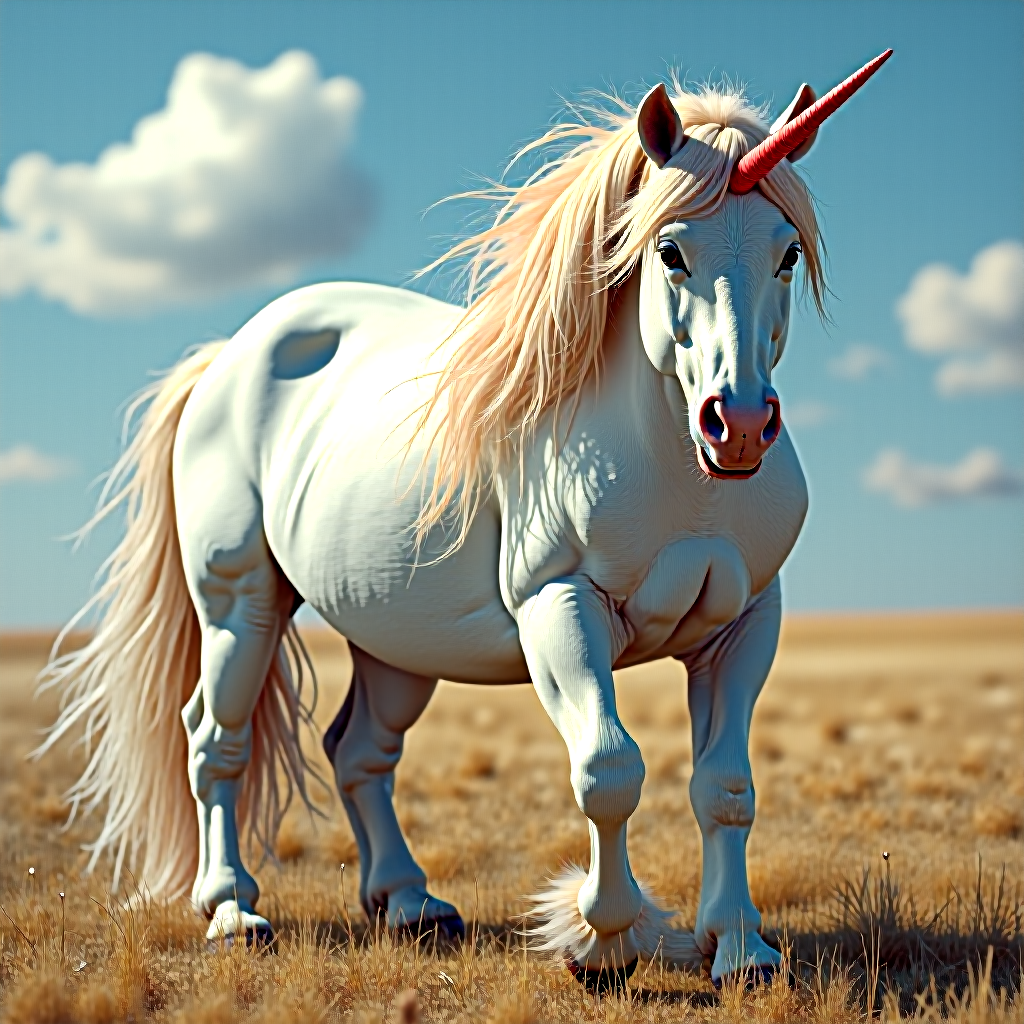

In [21]:
cached_pipe.run(
    "A unicorn",
    num_inference_steps=28,
    seed=42,
    guidance_scale=3.5,
    latents=noise_unicorn.unsqueeze(0),
).images[0]

In [5]:
 # [0, 1, 2, 17, 18, 25, 28, 53, 54, 56].  [28, 53, 54, 56, 25]
vital_layers = [f"transformer.transformer_blocks.{i}" for i in [0, 1, 17, 18]] + \
                [f"transformer.single_transformer_blocks.{i-19}" for i in [25, 28, 53, 54, 56]]

prompts = ["A pony in the forest", "A dog in the forest", "A cat in the forest", "A mouse in the forest"]
images = cached_pipe.run_inject_qkv(
    prompts,
    num_inference_steps=28,
    seed=42,
    guidance_scale=3.5,
    positions_to_inject=vital_layers,
    empty_clip_embeddings=False
).images

tensor(1000., device='cuda:0')
torch.Size([4, 4096, 64])
tensor(988.4086, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(976.2225, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(963.3944, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(949.8726, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(935.5989, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(920.5090, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(904.5308, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(887.5834, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(869.5759, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(850.4057, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(829.9564, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(808.0955, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(784.6716, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(759.5109, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(732.4128, device='cuda:0')
torch.Size([4, 4096, 64])
tensor(703.1447, device='cuda:0')
torch.Siz

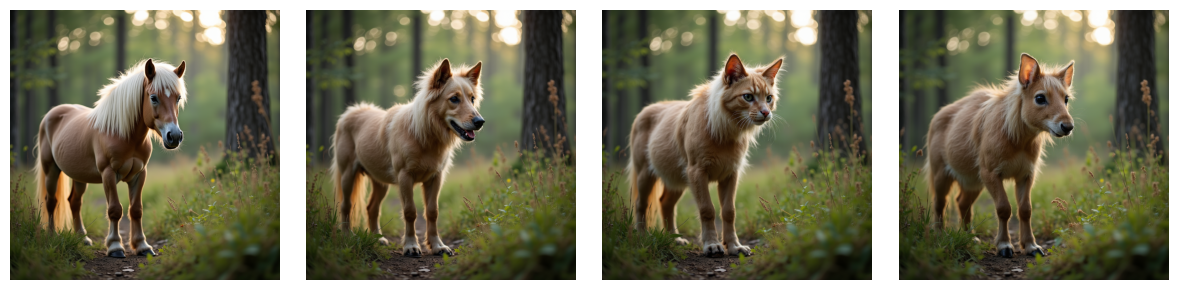

In [6]:
def display_images(imgs: list):
    fig, axes = plt.subplots(1, len(imgs), figsize=(len(imgs)*3, 3))
    for ax, im in zip(axes, imgs):
        ax.imshow(im)
        ax.axis('off')  # hide axes ticks

    plt.tight_layout()
    plt.show()

display_images(images)

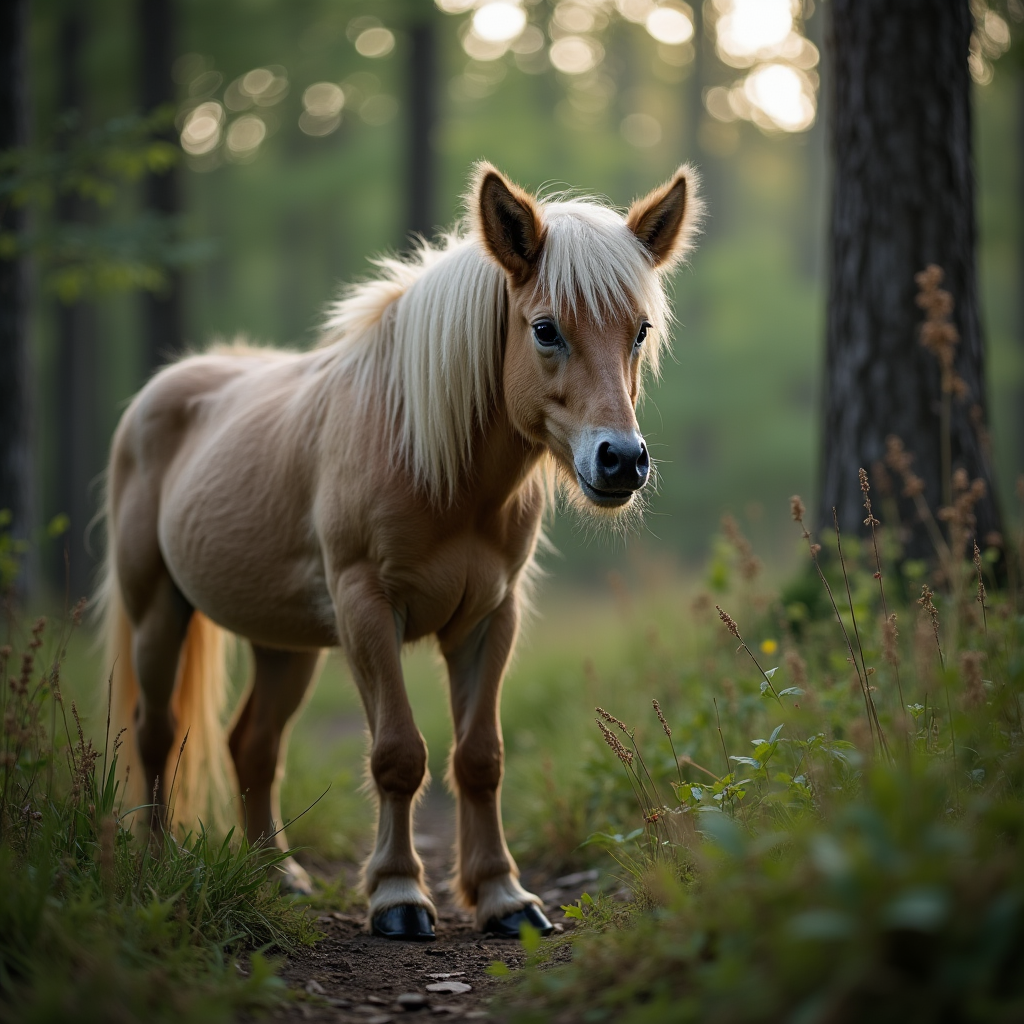

In [ ]:
dest_prompt = "A killer in the forest"
image = cached_pipe_dest.run_inject_qkv(
    dest_prompt,
    qkv_to_inject=cached_pipe.qkv_cache,
    positions_to_inject=vital_layers,
    num_inference_steps=28,
    guidance_scale=3.5,
    seed=42,
    empty_clip_embeddings=False
).images[0]
image.show()

In [7]:
dest_prompt = "A cute dog holding a sign that says Bonjour"

image = CachedPipeline(pipe).run(
    dest_prompt,
    num_inference_steps=1,
    seed=42,
    cache_activations=False,
    cache_qkv=False
).images[0]
image.show()

IndexError: pop from empty list

In [5]:
del pipe
clear_all_gpu_memory()

Found 2 GPU(s).
GPU memory cleared across all available devices.


## PixART-Sigma

In [12]:
from diffusers import Transformer2DModel, PixArtSigmaPipeline

pipe = PixArtSigmaPipeline.from_pretrained(
    "PixArt-alpha/PixArt-Sigma-XL-2-1024-MS", 
    device_map="balanced",
)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]